# Shape descriptor analysis (Part 2)

We finally have some numbers to work with.
- **Traditional shape descriptors**: 11 numbers, like grain length, width, height, etc
- **Topological shape descriptors**: Variable number: from the Euler Characteristic Transform

How good are these descriptors? Can we characterize the shape of different founders based solely on their grain morphology? We can train a Support Vector Machine (SVM) with an 80/20 train/test breakdown and test the classification accuracy. The SVM can be trained with either
- Purely traditional descriptors
- Purely topological descriptors
- A combination of both descriptors

Take into account that the ECT produces extremely large vectors. To avoid pathological behavior, we must reduce their dimension as a first step.

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))

## Setup

In [2]:
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')

In [3]:
setwd('/home/ejam/documents/barley_stacks/preproc/norm_ect/results')
d <- 158
TT <- 8
kernel <- 'laplacedot'
dims <- 12
norm <- 'Normalized Size'

In [4]:
founders <- read.csv(paste('ect_d74_T4.csv',sep=''))
founders_names_original <- levels(unique(founders$Founder))
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


## Combined descriptors

In [5]:
info_type <- 'Combined'
filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT, kernel, dims, 'founders.rds', sep='_')

results <- base::readRDS(filename)
foolist <- get_confusion(results)
mixed_confusion <- foolist[[1]]
mixed_accuracy <- foolist[[2]]

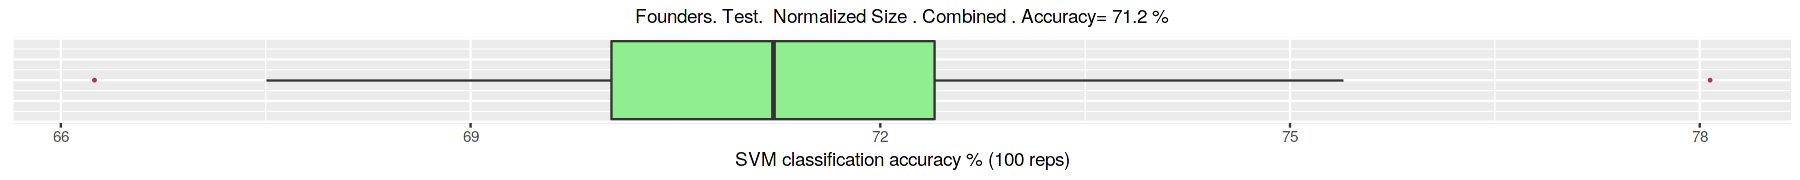

In [6]:
options(repr.plot.width=15, repr.plot.height=1.5)
p <- plot_accuracy(mixed_accuracy, d, TT, kernel, dims, info_type, norm)
p

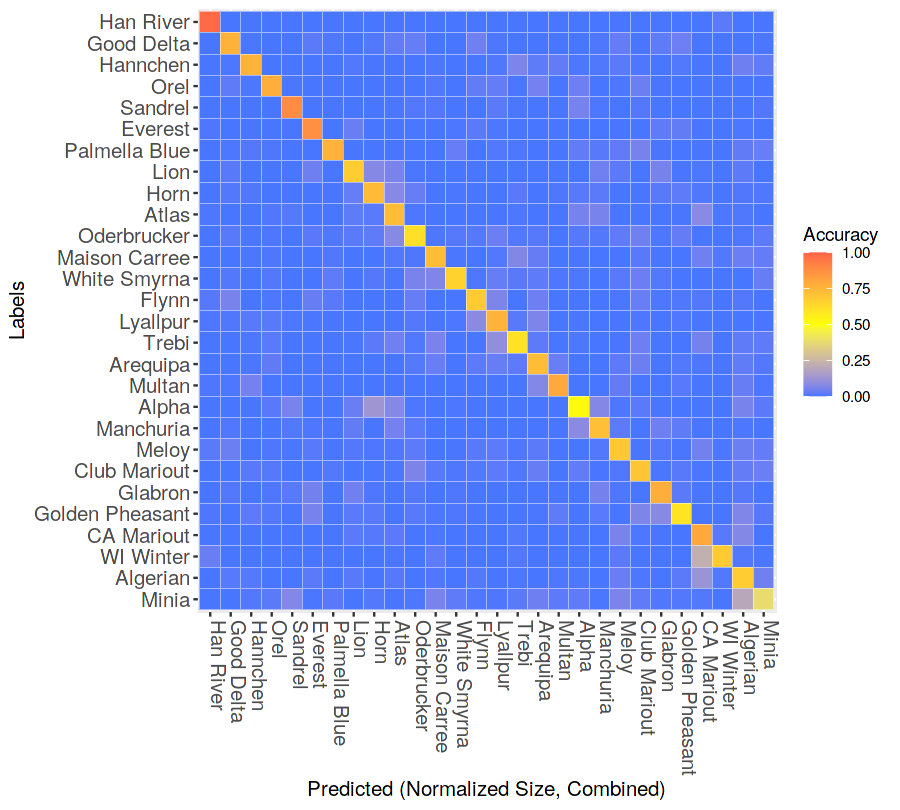

In [20]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(mixed_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

## Topological descriptors

In [7]:
info_type <- 'Topological'
filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT, kernel, dims, 'founders.rds', sep='_')

results <- base::readRDS(filename)
foolist <- get_confusion(results)
topo_confusion <- foolist[[1]]
topo_accuracy <- foolist[[2]]

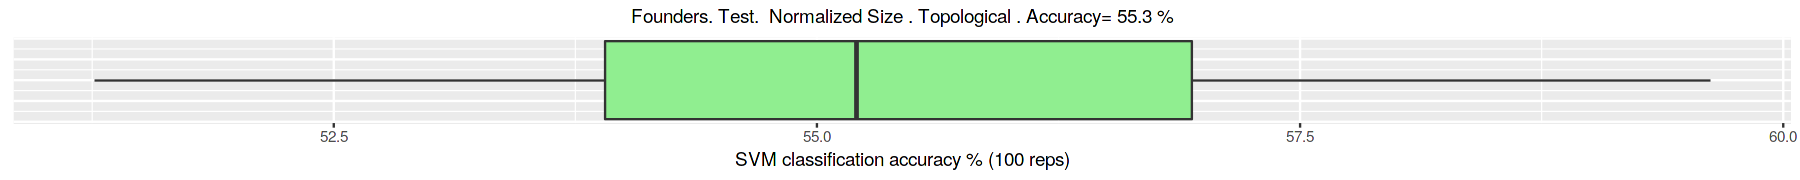

In [8]:
options(repr.plot.width=15, repr.plot.height=1.5)
p <- plot_accuracy(topo_accuracy, d, TT, kernel, dims, info_type, norm)
p

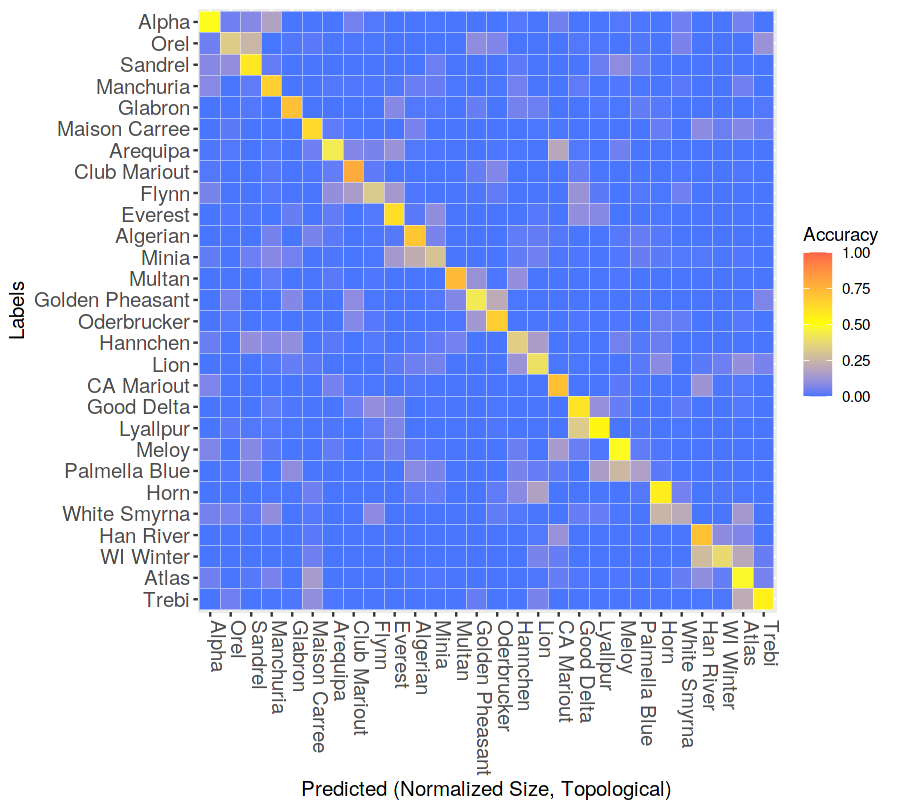

In [23]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(topo_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

## Traditional descriptors

In [9]:
info_type <- 'Traditional'
filename <- 'svm_results_traditional_founders.rds'

results <- base::readRDS(filename)
foolist <- get_confusion(results)
trad_confusion <- foolist[[1]]
trad_accuracy <- foolist[[2]]

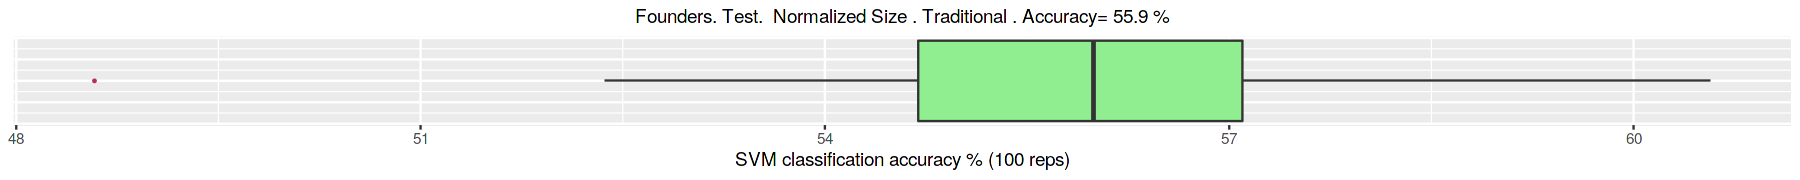

In [33]:
options(repr.plot.width=15, repr.plot.height=1.5)
p <- plot_accuracy(trad_accuracy, d, TT, kernel, dims, info_type, norm)
p

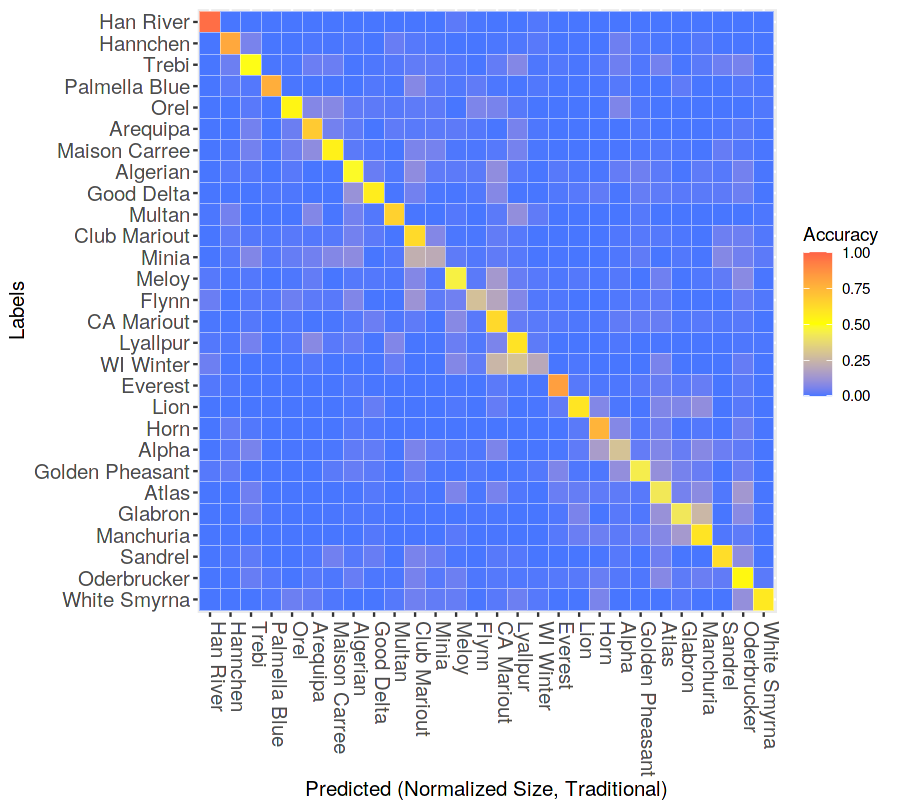

In [34]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(trad_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

In [10]:
signif(quantile(trad_accuracy, c(0.25, 0.5, 0.75)),3)*100
signif(quantile(topo_accuracy, c(0.25, 0.5, 0.75)),3)*100
signif(quantile(mixed_accuracy, c(0.25, 0.5, 0.75)),3)*100

signif(mean(trad_accuracy)*100, 3)
signif(mean(topo_accuracy)*100, 3)
signif(mean(mixed_accuracy)*100, 3)

25%  50%  75% 
54.7 56.0 57.1

25%  50%  75% 
53.9 55.2 56.9

25%  50%  75% 
70.0 71.2 72.4

[1] 55.9

[1] 55.3

[1] 71.2

## Pairwise comparison

In [41]:
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')

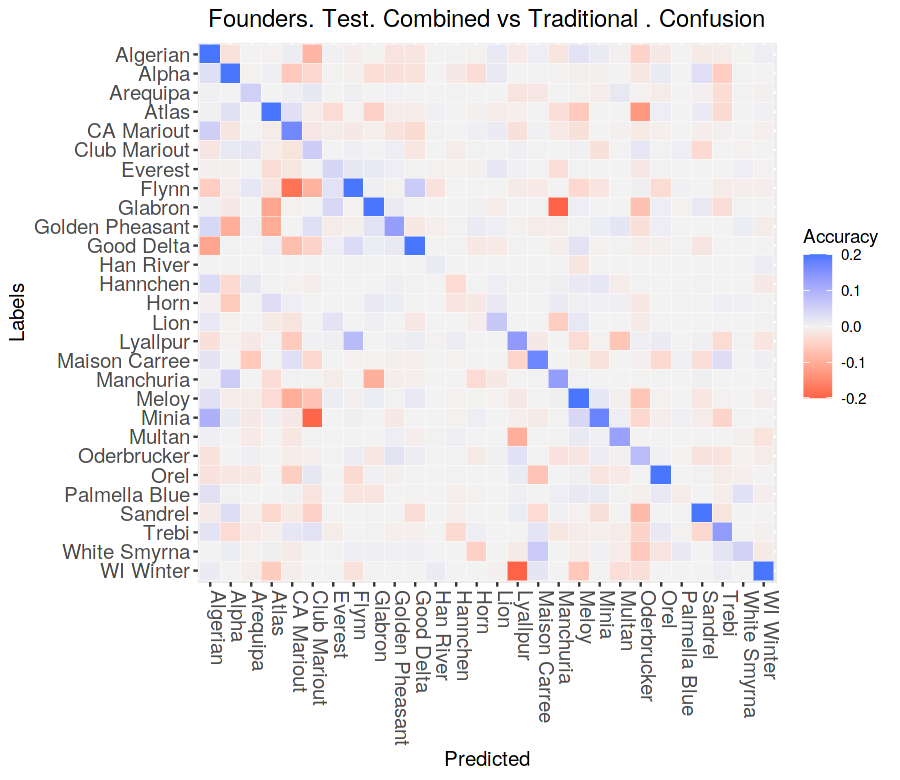

In [11]:
info_type <- 'Combined vs Traditional'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (mixed_confusion - trad_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [12]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

       Hannchen            Horn   Palmella Blue       Han River         Everest 
          -3.39           -1.55           -1.00            1.27            4.27 
   White Smyrna        Arequipa    Club Mariout            Lion     Oderbrucker 
           5.00            5.18            5.69            6.58            8.33 
         Multan Golden Pheasant       Manchuria           Trebi        Lyallpur 
          12.60           13.11           13.12           13.58           13.83 
     CA Mariout   Maison Carree           Minia      Good Delta        Algerian 
          16.87           17.20           17.48           20.50           20.66 
          Alpha            Orel           Meloy         Sandrel           Atlas 
          22.22           22.60           26.47           27.55           30.52 
        Glabron           Flynn       WI Winter 
          35.91           40.69           46.60 


[1] "Median diag: 13.705"

[1] "Mean diag: 15.78"

## Combined vs Topological 

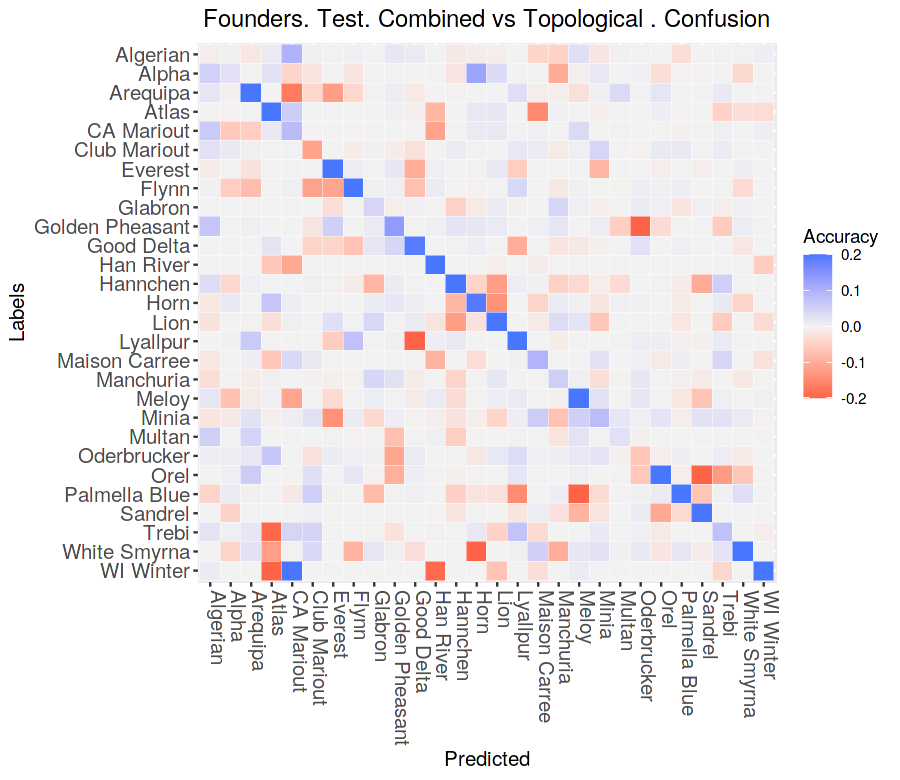

In [13]:
info_type <- 'Combined vs Topological'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (mixed_confusion - topo_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [14]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

   Club Mariout     Oderbrucker        Algerian           Alpha          Multan 
         -11.54           -6.54           -0.76            2.67            2.70 
        Glabron       Manchuria           Trebi           Minia      CA Mariout 
           4.39            5.56            7.50            8.17            8.39 
  Maison Carree Golden Pheasant      Good Delta            Horn        Lyallpur 
           9.60           13.61           19.00           19.25           21.04 
        Everest           Meloy       Han River           Atlas            Lion 
          23.73           23.91           24.53           25.44           27.04 
       Arequipa       WI Winter         Sandrel           Flynn    White Smyrna 
          29.73           30.80           33.45           39.50           41.08 
       Hannchen            Orel   Palmella Blue 
          42.28           45.07           59.00 


[1] "Median diag: 20.145"

[1] "Mean diag: 19.59"

## Traditional vs Topological 

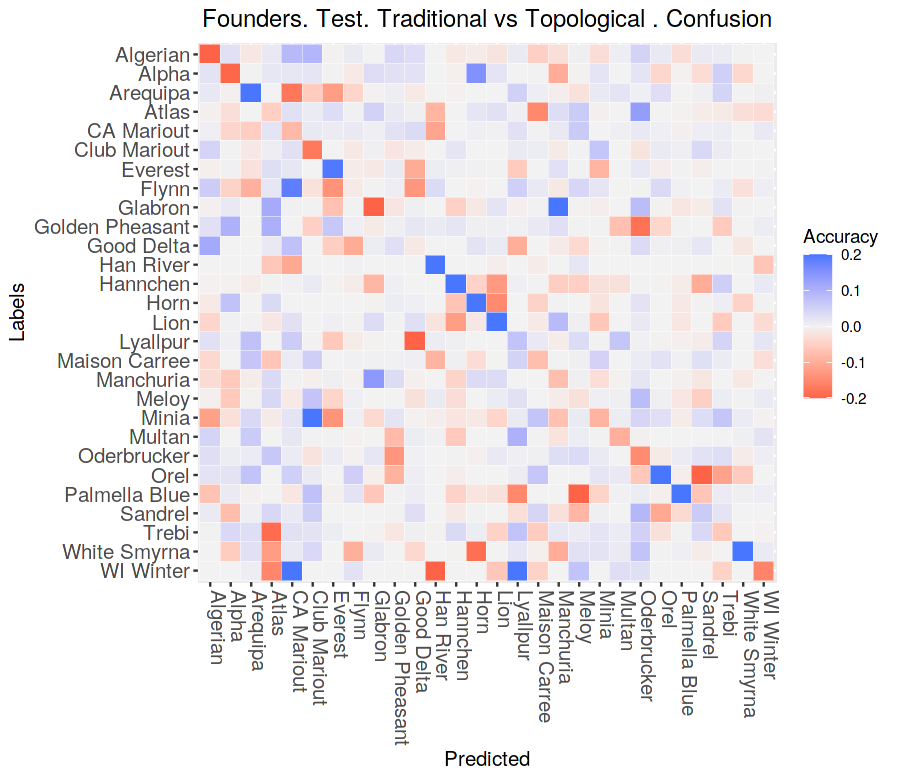

In [15]:
info_type <- 'Traditional vs Topological'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (trad_confusion - topo_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [16]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

        Glabron        Algerian           Alpha    Club Mariout       WI Winter 
         -31.52          -21.41          -19.56          -17.23          -15.80 
    Oderbrucker          Multan           Minia      CA Mariout   Maison Carree 
         -14.87           -9.90           -9.30           -8.47           -7.60 
      Manchuria           Trebi           Atlas           Meloy      Good Delta 
          -7.56           -6.08           -5.07           -2.56           -1.50 
          Flynn Golden Pheasant         Sandrel        Lyallpur         Everest 
          -1.19            0.50            5.90            7.22           19.46 
           Lion            Horn            Orel       Han River        Arequipa 
          20.46           20.80           22.47           23.27           24.55 
   White Smyrna        Hannchen   Palmella Blue 
          36.08           45.67           60.00 


[1] "Median diag: -2.03"

[1] "Mean diag: 3.81"

## More comparisons

In [32]:
svm_scores <- matrix(0,ncol=3,nrow=length(founders_names))
base::rownames(svm_scores) <- founders_names
base::colnames(svm_scores) <- c('Traditional', 'Topological', 'Combined')
svm_scores[,1] <- diag(trad_confusion)
svm_scores[,2] <- diag(topo_confusion)
svm_scores[,3] <- diag(mixed_confusion)
df_original <- data.frame(svm_scores)
df_original$Line <- founders_names

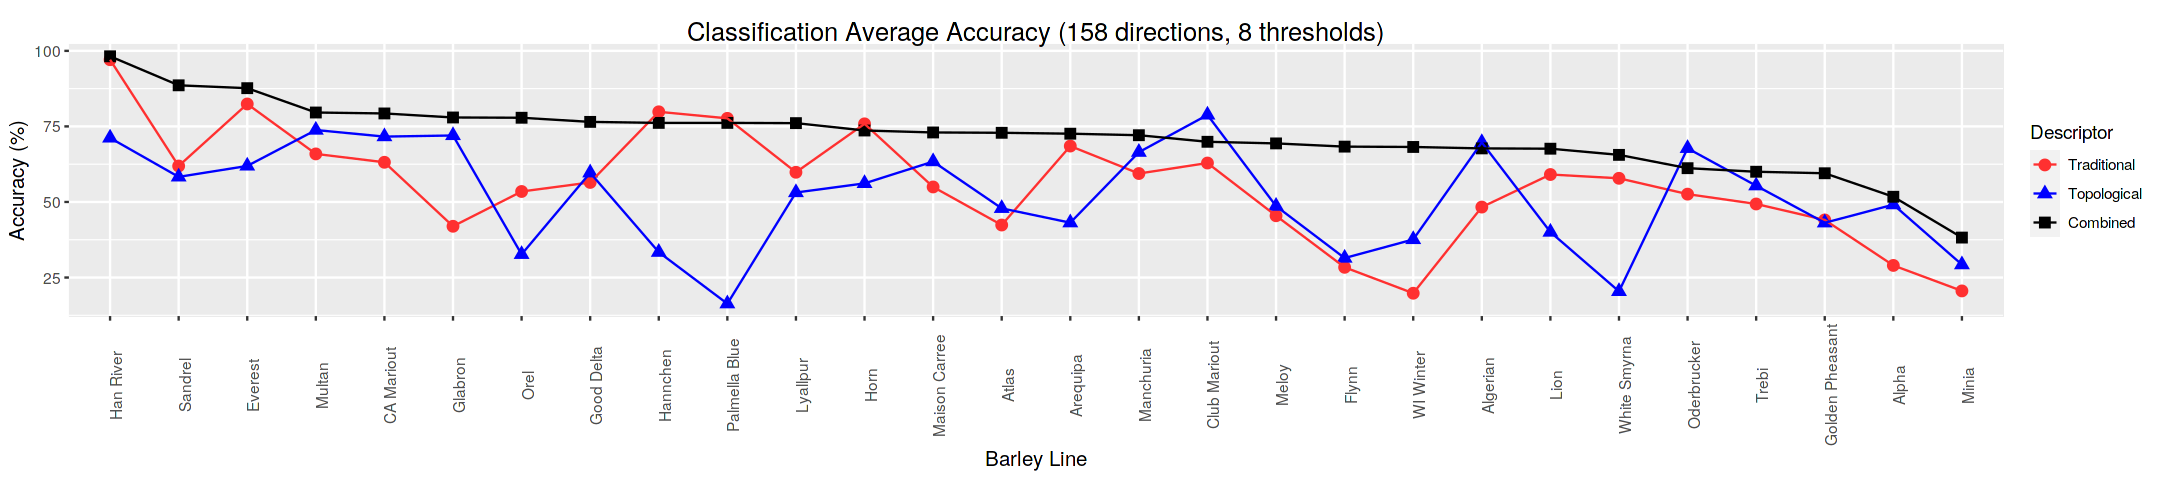

In [35]:
options(repr.plot.width=18, repr.plot.height=4)
p <- compare_descriptor_accuracies(df_original, 'Combined', d, TT, kernel, dims, norm, TRUE)
#p <- compare_descriptor_accuracies(df, 'Topological', d, TT, kernel, dims, norm)
#p <- compare_descriptor_accuracies(df, 'Combined', d, TT, kernel, dims, norm)
p